숫자예측 모델(LSTM)

In [18]:
import numpy as np
import tensorflow as ts
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [19]:
# 1. 데이터 생성(랜덤 숫자 시퀀스)
data = np.array([i for i in range(1, 21)]) # 1부터 20까지의 숫자
timesteps = 3 # 타임스텝 길이

In [20]:
x_data = []
y_data = []

In [21]:
# 타임스텝에 따라 입력 데이터와 출력 데이터 생성
for i in range(len(data) - timesteps):
    x_data.append(data[i:i + timesteps]) # 입력(3개의 숫자)
    y_data.append(data[i + timesteps]) # 출력(다음 숫자)

x_data = np.array(x_data).reshape(-1, timesteps, 1) # (샘플 수, 타임스텝, 피처 수)
y_data = np.array(y_data)

In [22]:
# 2. LSTM 모델 정의
model = Sequential([
    LSTM(10, input_shape=(timesteps, 1)),  # LSTM 레이어 (유닛: 10)
    Dense(1)  # 출력 레이어
])

In [24]:
model.compile(optimizer="adam", loss="mse")

In [25]:
# 4. 모델 학습
model.fit(x_data, y_data, epochs=1000, verbose=1) # 100번 반복 학습

Epoch 1/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 376ms/step - loss: 160.2769
Epoch 2/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 160.0154
Epoch 3/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 159.7555
Epoch 4/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 159.4970
Epoch 5/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 159.2400
Epoch 6/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 158.9843
Epoch 7/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 158.7299
Epoch 8/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 158.4768
Epoch 9/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 158.2247
Epoch 10/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 157.9738
Epoch 11/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 157.7238
Epoch 12/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 157.4748
Epoch 13/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 157.2266
Epoch 14/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 156.9791
Epoch 15/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 

In [27]:
# 4. 예측 테스트
test_input = np.array([18, 19, 20]).reshape(1, timesteps, 1) # 입력 예시
predicted_value = model.predict(test_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


In [28]:
# 결과 출력
print("입력 데이터:", test_input.flatten()) # flatten함수 : [[1, 2], [3, 4]] --> [1, 2, 3, 4]
print("예측 값:", predicted_value[0][0])

입력 데이터: [18 19 20]
예측 값: 12.191699


기온예측 모델(RNN)

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

In [32]:
# 1. 데이터 로드
file_path = "../dataset/jena_climate_2009.csv"
data = pd.read_csv(file_path)

In [33]:
# 데이터 확인
data.head()

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.3,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
1,01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.4,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2,01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.9,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
3,01.01.2009 00:40:00,996.51,-8.31,265.12,-9.07,94.2,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
4,01.01.2009 00:50:00,996.51,-8.27,265.15,-9.04,94.1,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3


In [34]:
# 'T (degC)' 열이 기온 데이터
temperature = data["T (degC)"].values

In [35]:
# 2. 데이터 전처리
scaler = MinMaxScaler(feature_range=(0, 1)) # 정규화
scaler_data = scaler.fit_transform(temperature.reshape(-1, 1))

In [36]:
# 데이터셋 생성 함수
def create_dataset(dataset, look_back=60):
    X, y = [], []
    for i in range(len(dataset) - look_back):
        X.append(dataset[i:i+look_back, 0])
        y.append(dataset[i+look_back, 0])
    return np.array(X), np.array(y)

In [37]:
look_back = 60 # 과거 60시간 데이터를 기반으로 예측
X, y = create_dataset(scaler_data, look_back)
X = np.reshape(X, (X.shape[0], X.shape[1], 1)) # RNN 입력 형태

In [44]:
# 데이터 분리
train_size = int(len(X) * 0.8) # 80% 학습 데이터
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [45]:
# RNN 모델 구성
model = Sequential([
    SimpleRNN(50, return_sequences=False, input_shape=(X.shape[1], 1)),
    Dense(1)
])

/Users/jojungon/AI_Project/.venv/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [46]:
model.compile(optimizer="adam", loss="mean_squared_error")

In [48]:
# 모델 학습
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/100
543/543 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4.0174e-05 - val_loss: 6.8791e-05
Epoch 2/100
543/543 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.3209e-05 - val_loss: 3.8250e-05
Epoch 3/100
543/543 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.9708e-05 - val_loss: 3.8146e-05
Epoch 4/100
543/543 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.7760e-05 - val_loss: 3.5227e-05
Epoch 5/100
543/543 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.6528e-05 - val_loss: 3.1294e-05
Epoch 6/100
543/543 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.5944e-05 - val_loss: 6.0370e-05
Epoch 7/100
543/543 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.5473e-05 - val_loss: 2.7624e-05
Epoch 8/100
543/543 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.9605e-05 - val_loss: 2.7302e-05
Epoch 9/100
543/543 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.0191e-05 - val_loss: 4.0944e-05
Epoch 10/100
543/543 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.8297e-05 - val_loss: 2.6265e-05
Epoch 11/100
543/543 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/

In [49]:
# 5. 예측
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions) # 정규화 복원

136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


In [50]:
# 실제 값 복원
actual_values = scaler.inverse_transform(y_test.reshape(-1, 1))

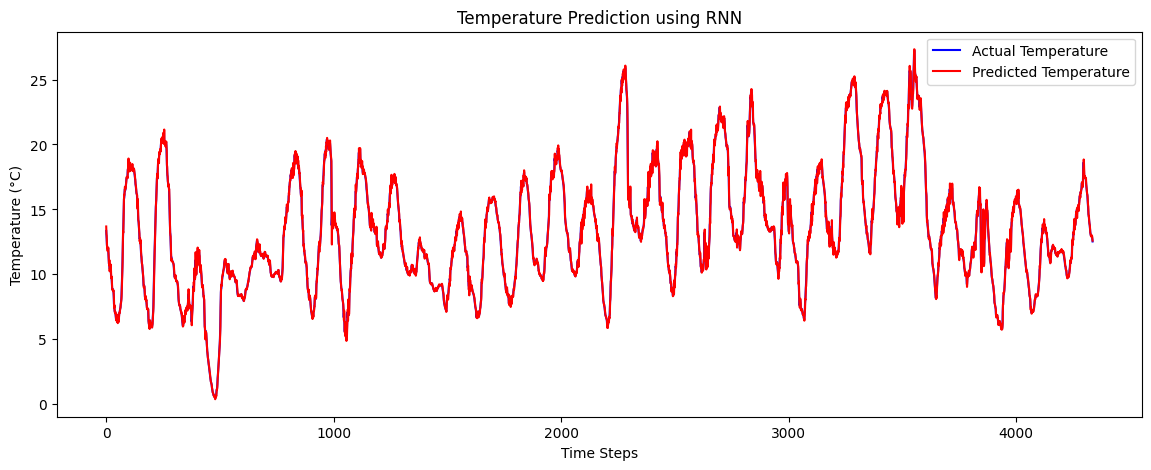

In [51]:
# 6. 시각화
plt.figure(figsize=(14, 5))
plt.plot(actual_values, label="Actual Temperature", color='blue')
plt.plot(predictions, label="Predicted Temperature", color='red')
plt.title('Temperature Prediction using RNN')
plt.xlabel('Time Steps')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.show()

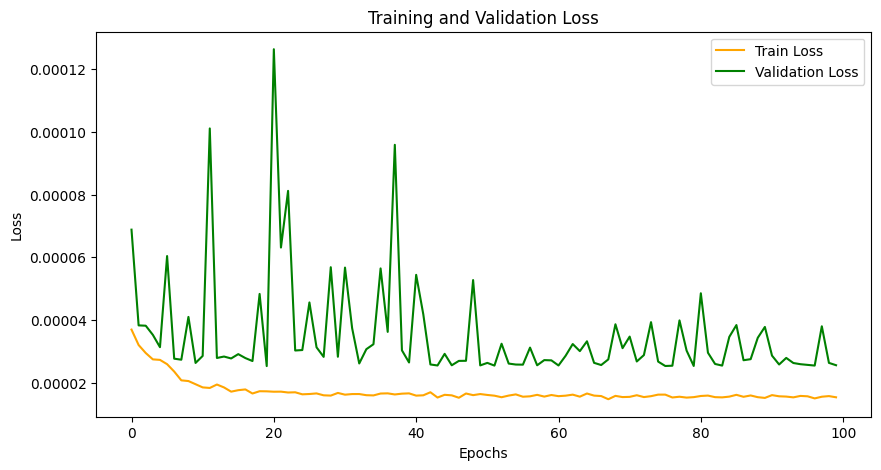

In [52]:
# 7. 학습 손실 시각화
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Train Loss', color='orange')
plt.plot(history.history['val_loss'], label='Validation Loss', color='green')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

주가예측 모델(LSTM)

In [53]:
# 증권데이터 수집 라이브러리 설치 :  pip install yfinance
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [54]:
# 1. 데이터 수집
ticker = "AAPL" # 예: 애플 주식
data = yf.download(ticker, start="2015-01-01", end="2024-01-01")
data = data[["Close"]]

[*********************100%***********************]  1 of 1 completed


In [55]:
data.head()

Price,Close
Ticker,AAPL
Date,
2015-01-02,24.347168
2015-01-05,23.661278
2015-01-06,23.663500
2015-01-07,23.995325
2015-01-08,24.917271


In [57]:
# 데이터 전처리
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

In [59]:
def create_dataset(dataset, look_back=60):
    X, y = [], []
    for i in range(len(dataset) - look_back):
        X.append(dataset[i:i+look_back, 0])
        y.append(dataset[i+look_back, 0])
    return np.array(X), np.array(y)

In [60]:
look_back = 60 # 과거 60일 데이터로 예측
X, y = create_dataset(scaled_data, look_back)
X = np.reshape(X, (X.shape[0], X.shape[1], 1)) # LSTM 입력 형태

In [61]:
# 3. 모델 구성
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X.shape[1], 1)), # 50 = 뉴런수, 기준은 없고 경험이 중요한 부분/유닛수
    LSTM(50),
    Dense(1)
])

/Users/jojungon/AI_Project/.venv/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [62]:
model.compile(optimizer="adam", loss="mean_squared_error")

In [63]:
# 4. 모델 학습
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [68]:
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 3.2488e-04 - val_loss: 6.5201e-04
Epoch 2/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 2.0299e-04 - val_loss: 0.0011
Epoch 3/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 2.4492e-04 - val_loss: 8.4370e-04
Epoch 4/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 2.0949e-04 - val_loss: 5.7788e-04
Epoch 5/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 1.8327e-04 - val_loss: 8.2636e-04
Epoch 6/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 1.9329e-04 - val_loss: 6.4931e-04
Epoch 7/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 2.0521e-04 - val_loss: 0.0011
Epoch 8/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 2.2613e-04 - val_loss: 5.1141e-04
Epoch 9/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 1.8845e-04 - val_loss: 6.8104e-04
Epoch 10/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 3.1248e-04 - val_loss: 8.4807e-04
Epoch 11/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 1.7370

In [69]:
# 5. 예측 및 시각화
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions.reshape(-1, 1))

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


In [70]:
# 실제 값 복원
actual_prices = scaler.inverse_transform(y_test.reshape(-1, 1))

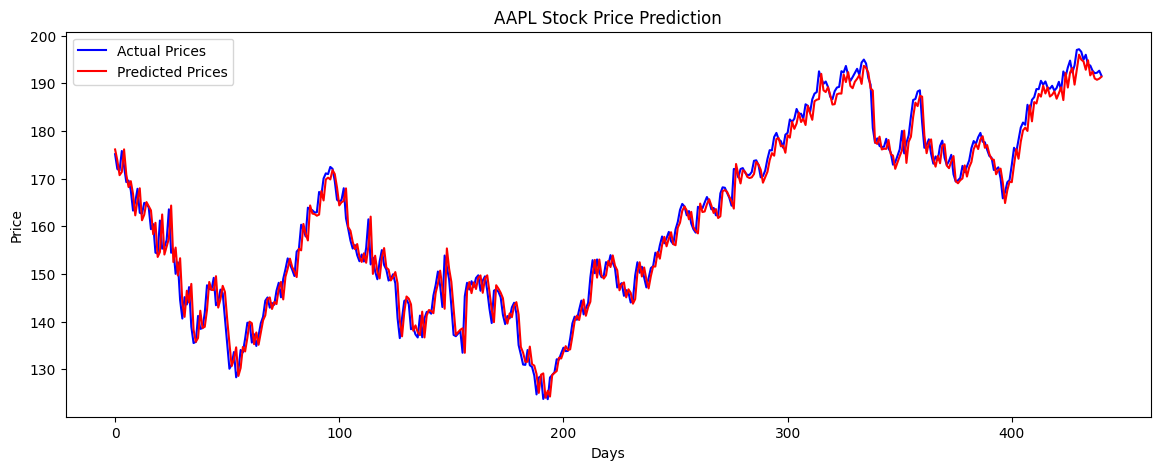

In [71]:
# 시각화
plt.figure(figsize=(14, 5))
plt.plot(actual_prices, label="Actual Prices", color='blue')
plt.plot(predictions, label="Predicted Prices", color='red')
plt.title(f'{ticker} Stock Price Prediction')
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend()
plt.show()

주가예측 모델(GRU)

In [72]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense

In [73]:
# 1. 데이터 수집
ticker = "AAPL" # 애플 주식
data = yf.download(ticker, start="2015-01-01", end="2024-01-01")
data = data[["Close"]] # 종가 데이터만 사용

[*********************100%***********************]  1 of 1 completed


In [74]:
# 2. 데이터 전처리
scaler = MinMaxScaler(feature_range=(0, 1)) # 데이터를 0~1 사이로 정규화
scaled_data = scaler.fit_transform(data)

In [75]:
# GRU 모델에 적합한 데이터 셋 생성 함수
def create_dataset(dataset, look_back=60):
    X, y = [], []
    for i in range(len(dataset) - look_back):
        X.append(dataset[i:i+look_back, 0])
        y.append(dataset[i+look_back, 0])
    return np.array(X), np.array(y)

In [76]:
look_back = 60 # 과거 60일 데이터로 예측
X, y = create_dataset(scaled_data, look_back)
X = np.reshape(X, (X.shape[0], X.shape[1], 1)) #GRU 입력 형태

In [77]:
# 3. GRU 모델 구성
model = Sequential([
    GRU(50, return_sequences=True, input_shape=(X.shape[1], 1)),
    GRU(50),
    Dense(1)
])

/Users/jojungon/AI_Project/.venv/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [81]:
model.compile(optimizer="adam", loss="mean_squared_error")

In [82]:
# 4. 모델 학습
train_size = int(len(X) * 0.8)  # 80% 학습 데이터, 20% 테스트 데이터
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [83]:
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0294 - val_loss: 6.1251e-04
Epoch 2/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 1.9266e-04 - val_loss: 5.5345e-04
Epoch 3/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 1.6704e-04 - val_loss: 4.8053e-04
Epoch 4/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 1.3591e-04 - val_loss: 4.6933e-04
Epoch 5/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 1.3875e-04 - val_loss: 4.3588e-04
Epoch 6/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 1.2814e-04 - val_loss: 5.3226e-04
Epoch 7/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 1.5845e-04 - val_loss: 4.1772e-04
Epoch 8/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 1.2636e-04 - val_loss: 4.2454e-04
Epoch 9/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 1.2378e-04 - val_loss: 4.4989e-04
Epoch 10/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 1.1492e-04 - val_loss: 3.4795e-04
Epoch 11/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 1.1421e-04 - 

In [84]:
# 5. 예측
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions.reshape(-1, 1))  # 정규화 복원

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


In [85]:
# 실제 값 복원
actual_prices = scaler.inverse_transform(y_test.reshape(-1, 1))

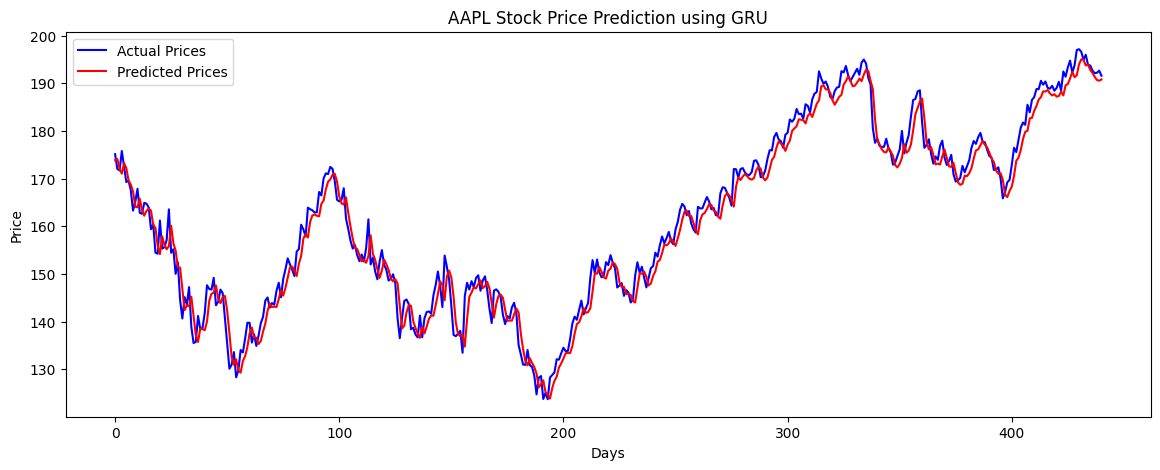

In [86]:
# 6. 시각화
plt.figure(figsize=(14, 5))
plt.plot(actual_prices, label="Actual Prices", color='blue')
plt.plot(predictions, label="Predicted Prices", color='red')
plt.title(f'{ticker} Stock Price Prediction using GRU')
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend()
plt.show()